# <p style="text-align: center;"> CSCI-455 | Computer Vision Systems </p>
<p style="text-align: center;">Correlations and Template Matching</p>
<p style="text-align: center;">Spring 2020</p>

<div class="alert alert-block alert-warning">
    1. Correlation vs Convolution kernels
</div>

### Correlation kernel

<img src="Notebook Images/image.gif" width="480">

### Sligtly Comparison

<img src="Notebook Images/CorrnConv.png" width="480">

### Boundary problems

<img src="Notebook Images/image2.jpg" width="480">

* Methods:
 - Clip Filter (Black)
 - Wrap Arround
 - Copy Edge
 - Reflect Across Edge
 
<img src="Notebook Images/image3.png" width="480">

* Step: Adding Boundaries then appling Filters then Cropping

In [2]:
import numpy as np
from copy import deepcopy
from matplotlib import pyplot as plt
from scipy.signal import fftconvolve
from matplotlib.patches import Rectangle

In [3]:
dolphin = plt.imread('Archive/dolphin.jpg')

<div class="alert alert-block alert-warning">
    2. In depth with Filters
</div>

### 1. Blurring filter

In [57]:
def Bluring(img, hight, width):
    Blurred_Image = deepcopy(img)
    for i in range(0,hight-3,1):
        for j in range(0,width-3, 1):
            Img = img[i:i+3,j:j+3]
            Filter = (1/9)* np.matrix('1 1 1; 1 1 1; 1 1 1')
            Filtered = Img * Filter
            Blurred_Image[i:i+3,j:j+3] = Filtered
    return Blurred_Image

result1 = Bluring(dolphin,400,600)

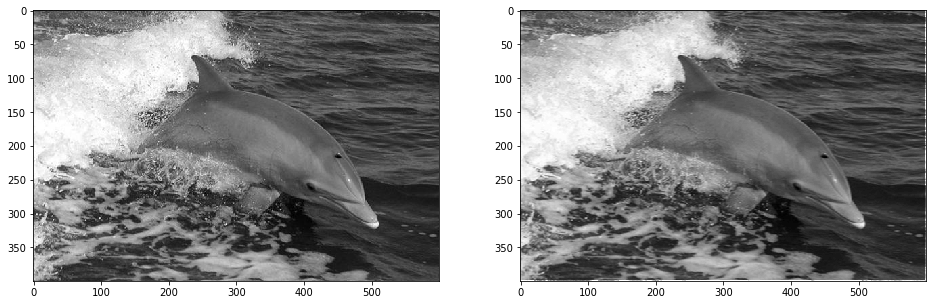

In [58]:
plt.figure(figsize=(16,15))
plt.subplot(1, 2, 1)
plt.imshow(dolphin, cmap='gray', vmin=0, vmax=255)
plt.subplot(1, 2, 2)
plt.imshow(result1, cmap='gray', vmin=0, vmax=85)
plt.show()

### 2. Sharpening filter

In [116]:
def Sharpn(img, hight, width):
    Sharp_Image = deepcopy(img)
    for i in range(0,hight-3,1):
        for j in range(0,width-3, 1):
            Img = img[i:i+3,j:j+3]
            Filter = (1/9)* np.matrix('0 -1 0; -1 5 -1; 0 -1 0')
            Filtered = Img * Filter
            Sharp_Image[i+1,j+1] = Filtered[1,1]
    return Sharp_Image

result2 = Sharpn(dolphin,400,600)

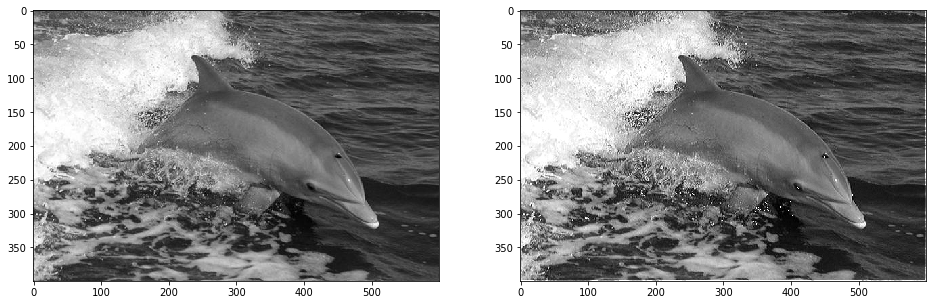

In [117]:
plt.figure(figsize=(16,15))
plt.subplot(1, 2, 1)
plt.imshow(dolphin, cmap='gray', vmin=0, vmax=255)
plt.subplot(1, 2, 2)
plt.imshow(result2, cmap='gray', vmin=0, vmax=83)
plt.show()

### 3. Median filter

In [61]:
def Median(img, hight, width):
    Median_Image = deepcopy(img)
    for i in range(0,hight-3,1):
        for j in range(0,width-3, 1):
            Img = img[i:i+3,j:j+3]
            Filter = np.median(Img)
            Median_Image[i+1,j+1] = Filter
    return Median_Image

result3 = Median(dolphin,400,600)

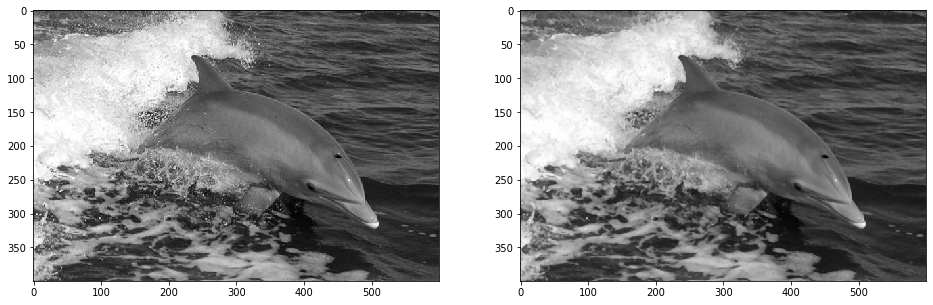

In [62]:
plt.figure(figsize=(16,15))
plt.subplot(1, 2, 1)
plt.imshow(dolphin, cmap='gray', vmin=0, vmax=255)
plt.subplot(1, 2, 2)
plt.imshow(result3, cmap='gray')
plt.show()

### Removing Noise with Gaussian or Median?!

Median:
* Robustness to Outliers
* More beneficial in removing noise
* Preserves edges while removing noise

<img src="Notebook Images/image4.jpg" width="480">

<div class="alert alert-block alert-warning">
    3. Edges
</div>

In [25]:
Shape = plt.imread('Archive/xShapes.png')[:,:,0]

### Vertical Edges

In [26]:
def Vedge(img, hight, width):
    Vedge_Image = deepcopy(np.zeros(img.shape))
    for i in range(0,hight-3,1):
        for j in range(0,width-3, 1):
            Img = img[i:i+3,j:j+3]
            Filter = np.matrix('1 2 1 ; 0 0 0 ; -1 -2 -1') #Sobel Opertor
            Filtered = Img * Filter
            Vedge_Image[i:i+3,j:j+3] = Filtered
    return Vedge_Image

result4 = Vedge(Shape,400,600)

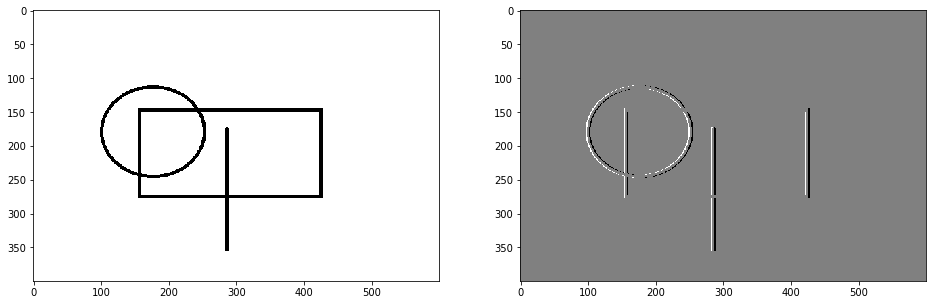

In [27]:
plt.figure(figsize=(16,15))
plt.subplot(1, 2, 1)
plt.imshow(Shape, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(result4, cmap='gray')
plt.show()

<div class="alert alert-block alert-warning">
    4. Median filter with Noise 
</div>

### 1. Creating Gaussian Noise

In [33]:
Sigma = 10
Gaussian = np.random.randn(400,600)*Sigma

### 2. Adding Noise then applying Median filter 

In [32]:
Noisedol = dolphin + Gaussian

def Median(img, hight, width):
    Median_Image = deepcopy(img)
    for i in range(0,hight-3,1):
        for j in range(0,width-3, 1):
            Img = img[i:i+3,j:j+3]
            Filter = np.median(Img)
            Median_Image[i+1,j+1] = Filter
    return Median_Image

Cleared = Median(Noisedol,400,600)

### 3. Plotting Results

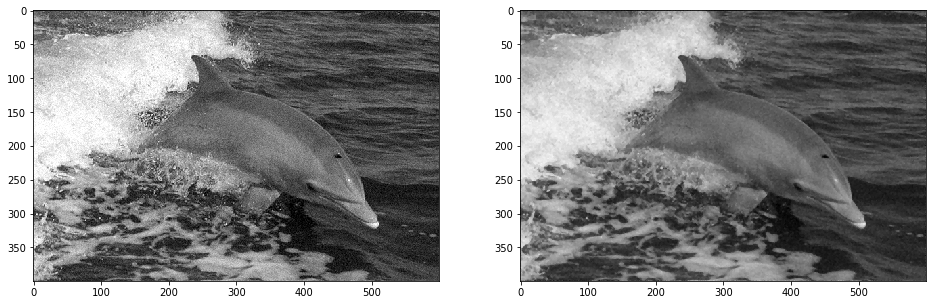

In [33]:
plt.figure(figsize=(16,15))
plt.subplot(1, 2, 1)
plt.imshow(Noisedol, cmap='gray', vmin=0, vmax=255)
plt.subplot(1, 2, 2)
plt.imshow(Cleared, cmap='gray')
plt.show()

<img src="Notebook Images/Noise.jpg" width="1000">

<div class="alert alert-block alert-warning">
    5. Template Matching
</div>

### 1. Cropping the face of the Dolphin

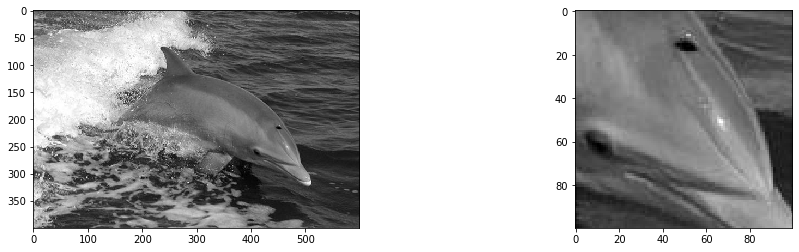

In [475]:
Cropped = dolphin[200:300,400:500]

H = Cropped.shape[0]
W = Cropped.shape[1]

plt.figure(figsize=(16,4))
plt.subplot(1, 2, 1)
plt.imshow(dolphin, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(Cropped, cmap='gray')
plt.show()

### 2. Computing the Correlation between the two Images

In [476]:
def Corr(template, image, mode="full"):

    template = template - np.mean(template)
    image = image - np.mean(image)

    a1 = np.ones(template.shape)
    ar = np.flipud(np.fliplr(template))

    out = fftconvolve(image, ar.conj(), mode=mode)
    image = fftconvolve(np.square(image), a1, mode=mode) - \
            np.square(fftconvolve(image, a1, mode=mode)) / (np.prod(template.shape))

    # Remove small machine precision errors after subtraction
    image[np.where(image < 0)] = 0
    template = np.sum(np.square(template))
    out = out / np.sqrt(image * template)

    out[np.where(np.logical_not(np.isfinite(out)))] = 0
    return out

### 3. Plotting Correlation Map

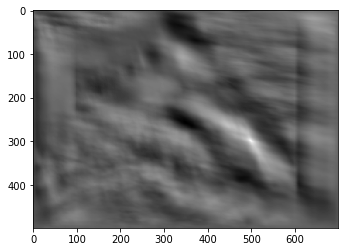

In [477]:
CorrMap = Corr(Cropped,dolphin)
plt.imshow(CorrMap, cmap='gray')

### 4. Plotting Max Matching Correlation Indices

Shape found in Coordinates (299, 499) ..


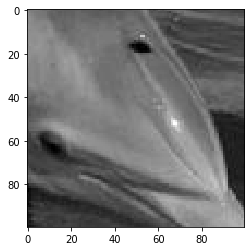

In [479]:
Indices = np.unravel_index(np.argmax(CorrMap, axis=None), CorrMap.shape)
plt.imshow(dolphin[Indices[0]-H:Indices[0],Indices[1]-W:Indices[1]], cmap='gray')
print("Shape found in Coordinates {} ..".format(Indices))

### Testing on another Image

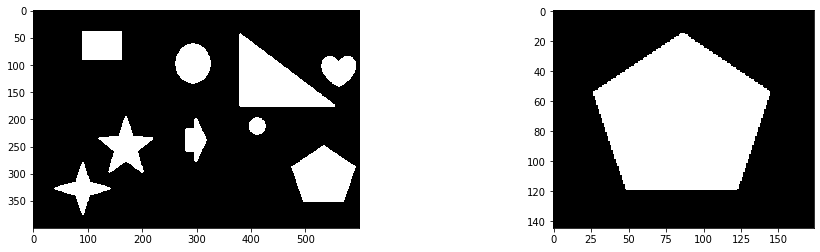

In [460]:
Shapes = plt.imread('Archive/Shapes.png')[:,:,0]
Search = plt.imread('Archive/Search.png')[:,:,0]

H = Search.shape[0]
W = Search.shape[1]

plt.figure(figsize=(16,4))
plt.subplot(1, 2, 1)
plt.imshow(Shapes, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(Search, cmap='gray')
plt.show()

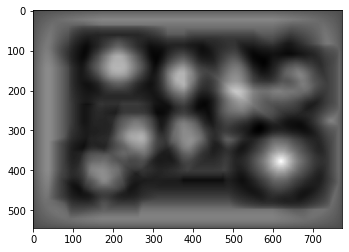

In [461]:
CorrMap = Corr(Search,Shapes)
plt.imshow(CorrMap, cmap='gray')

Shape found in Coordinates (377, 620) ..


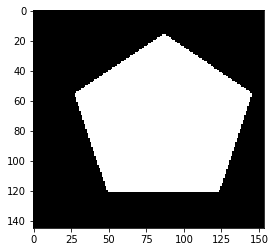

In [465]:
Indices = np.unravel_index(np.argmax(CorrMap, axis=None), CorrMap.shape)
plt.imshow(Shapes[Indices[0]-H:Indices[0],Indices[1]-W:Indices[1]], cmap='gray')
print("Shape found in Coordinates {} ..".format(Indices))

### Let' make it Harder..

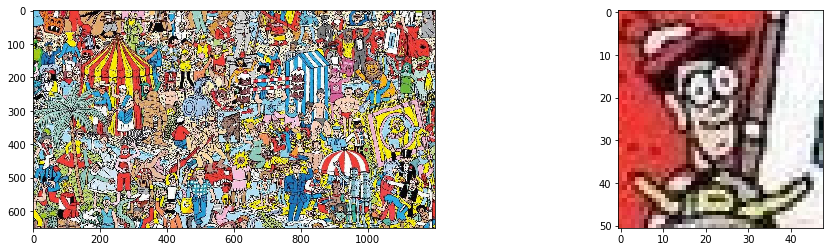

In [488]:
Paint = plt.imread('Archive/Paint.jpg')
Waldo = plt.imread('Archive/Waldo.jpg')

H = Waldo.shape[0]
W = Waldo.shape[1]

CorrMap = Corr(Waldo,Paint)
plt.figure(figsize=(16,4))
plt.subplot(1, 2, 1)
plt.imshow(Paint)
plt.subplot(1, 2, 2)
plt.imshow(Waldo)
plt.show()

Shape found in Coordinates (125, 1061, 3) ..


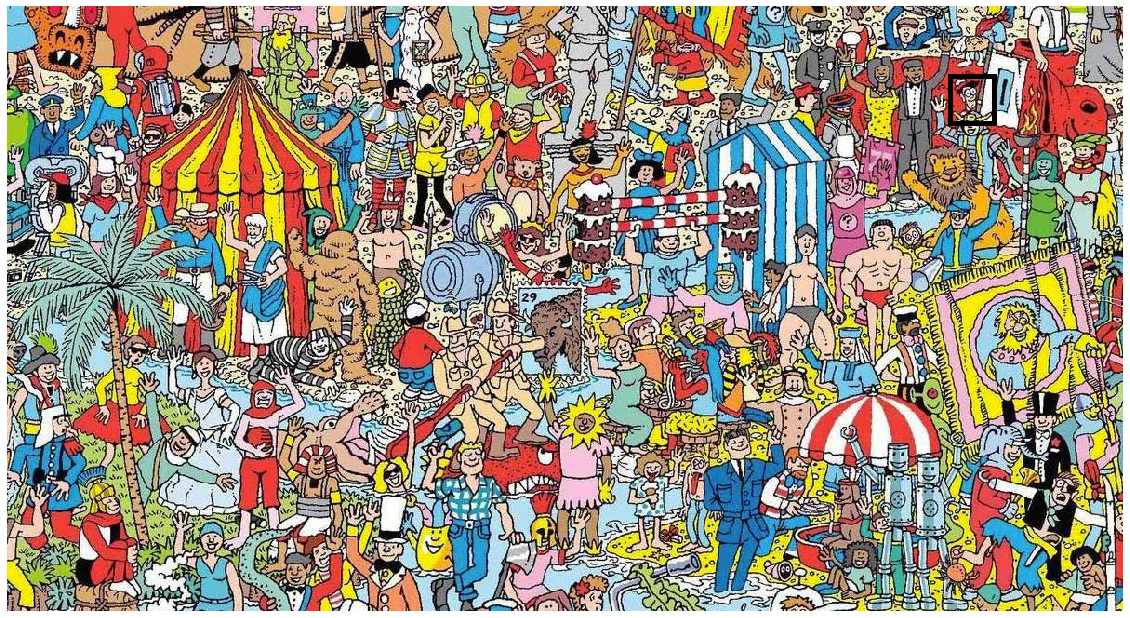

In [489]:
Indices = np.unravel_index(np.argmax(CorrMap, axis=None), CorrMap.shape)
plt.figure(figsize = (20,15))
plt.imshow(Paint)
plt.gca().add_patch(Rectangle((Indices[1]-W, Indices[0]-H),W,H,linewidth=5,edgecolor='black',facecolor='none'))
plt.axis('off')
print("Shape found in Coordinates {} ..".format(Indices))

### Let' make it more Trickier !!

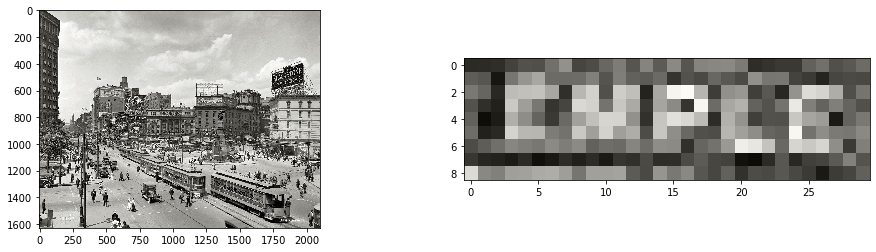

In [492]:
Paint2 = plt.imread('Archive/Paint2.jpg')
Man    = plt.imread('Archive/Man.jpg')

H = Man.shape[0]
W = Man.shape[1]

CorrMap = Corr(Man,Paint2)
plt.figure(figsize=(16,4))
plt.subplot(1, 2, 1)
plt.imshow(Paint2)
plt.subplot(1, 2, 2)
plt.imshow(Man)
plt.show()

Shape found in Coordinates (939, 1575, 2) ..


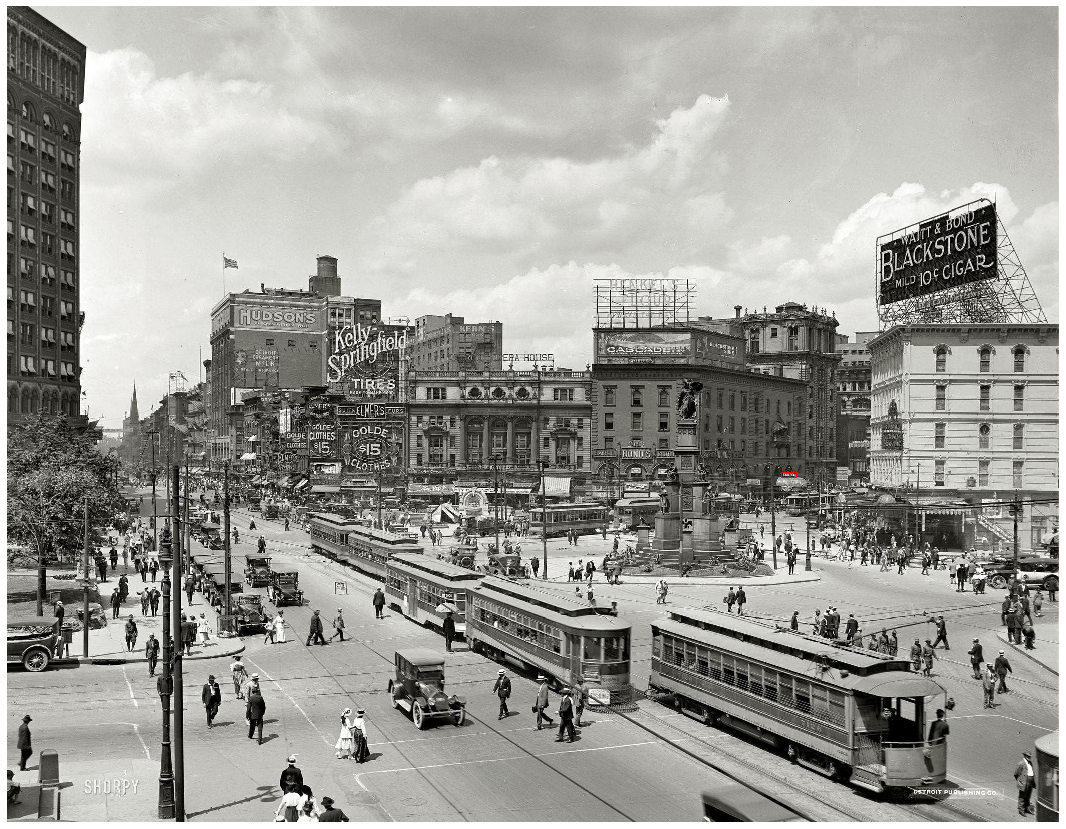

In [494]:
Indices = np.unravel_index(np.argmax(CorrMap, axis=None), CorrMap.shape)
plt.figure(figsize = (20,15))
plt.imshow(Paint2)
plt.gca().add_patch(Rectangle((Indices[1]-W, Indices[0]-H),W,H,linewidth=1,edgecolor='r',facecolor='none'))
plt.axis('off')
print("Shape found in Coordinates {} ..".format(Indices))